In [0]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
image_dim=32

In [0]:
def parse_function(filenames):
    #print(filename , label)
    image_string  = tf.read_file(filenames)

    #dont use tf.image.decode_image , or the output shape will be undefined
    image         = tf.image.decode_png(image_string , channels = 3)

    #This will convert to float values in [0 , 1]
    image         = tf.image.convert_image_dtype(image , tf.float32)

    resized_image = tf.image.resize_images(image , [image_dim , image_dim])
    return resized_image 

def train_preprocess(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image , max_delta = 32.0/255.0)
    image = tf.image.random_saturation(image , lower = 0.5 , upper = 1.5)

    #make sure the image is still in [0 , 1]
    image = tf.clip_by_value(image , 0.0 , 1.0)
    return image 


In [0]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)

    iterator = dataset.make_one_shot_iterator()
    return iterator

In [0]:
def build_training(filenames):
    X            = np.zeros((len(filenames) , image_dim , image_dim , 3))
    iterator     = read_data(filenames)
    next_element = iterator.get_next()
    
    with tf.Session() as sess :
        for i in range (len(filenames)):
            image_example = sess.run(next_element)
            X[i , : , :]  = image_example[: , : , :]
    return X

In [32]:
filenames = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg'
             ,'11.jpg','12.jpg','13.jpg','14.jpg','15.jpg','16.jpg','17.jpg','18.jpg','19.jpg'
             ,'20.jpg','21.jpg','22.jpg','23.jpg','24.jpg','25.jpg','26.jpg','27.jpg','28.jpg'
             ,'29.jpg','30.jpg','31.jpg','32.jpg','33.jpg','34.jpg','35.jpg','36.jpg','37.jpg'
             ,'38.jpg','39.jpg','40.jpg','41.jpg','42.jpg','43.jpg','44.jpg','45.jpg','46.jpg'
             ,'47.jpg','48.jpg','49.jpg','50.jpg','51.jpg','52.jpg','53.jpg','54.jpg','55.jpg'
             ,'56.jpg','57.jpg','58.jpg','59.jpg','60.jpg','61.jpg','62.jpg','63.jpg','64.jpg'
             ,'65.jpg','66.jpg','67.jpg','68.jpg','69.jpg','70.jpg','71.jpg','72.jpg','73.jpg'
             ,'74.jpg','75.jpg','76.jpg','77.jpg','78.jpg','79.jpg','80.jpg','81.jpg','82.jpg'
             ,'83.jpg','84.jpg','85.jpg','86.jpg','87.jpg','88.jpg','89.jpg','90.jpg','91.jpg'
             ,'92.jpg','93.jpg','94.jpg','95.jpg','96.jpg','97.jpg','98.jpg','99.jpg','100.jpg']

Y         = np.array([0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9,
                      0,1,2,3,4,5,6,7,8,9])

X         = build_training(filenames)

model     = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(image_dim*image_dim*3 , activation = tf.nn.relu),
           
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
            ]) 

model.compile(optimizer = 'adam' ,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])
model.fit(X,Y,epochs=5000,batch_size=50)

model.summary()

model.evaluate(X,Y)

Epoch 1/5000
100/100 [==============================] - 1s 7ms/step - loss: 6.3751 - acc: 0.0800
Epoch 2/5000
100/100 [==============================] - 0s 328us/step - loss: 10.1998 - acc: 0.0900
Epoch 3/5000
100/100 [==============================] - 0s 321us/step - loss: 11.4497 - acc: 0.0800
Epoch 4/5000
100/100 [==============================] - 0s 345us/step - loss: 12.8124 - acc: 0.1000
Epoch 5/5000
100/100 [==============================] - 0s 325us/step - loss: 12.7735 - acc: 0.1200
Epoch 6/5000
100/100 [==============================] - 0s 320us/step - loss: 12.3980 - acc: 0.0900
Epoch 7/5000
100/100 [==============================] - 0s 303us/step - loss: 11.9315 - acc: 0.1000
Epoch 8/5000
100/100 [==============================] - 0s 331us/step - loss: 12.7473 - acc: 0.1000
Epoch 9/5000
100/100 [==============================] - 0s 336us/step - loss: 12.4035 - acc: 0.1000
Epoch 10/5000
100/100 [==============================] - 0s 360us/step - loss: 12.8523 - acc: 0.1000
Ep

[0.0046739611774682995, 1.0]

In [33]:
arr = ["a","b","c","d","e","f","g","h","i","j"]
predict = model.predict(X)

for i in range(99):
    print(arr[Y[i]],">> should be >>",arr[np.argmax(predict[i])])
    print("===================================")

('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('c', '>> should be >>', 'c')
('d', '>> should be >>', 'd')
('d', '>> should be >>', 'd')
('d', '>> should be >>', 'd')
('d', '>> 

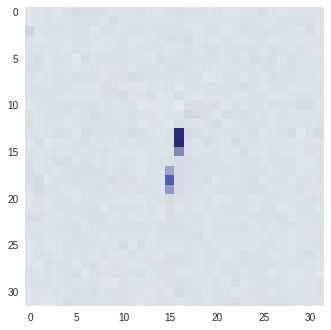

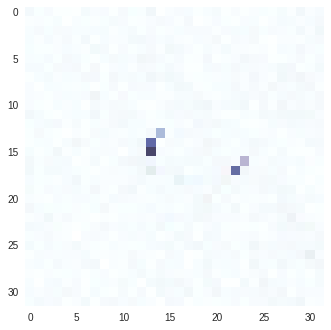

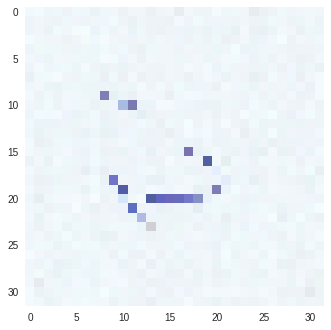

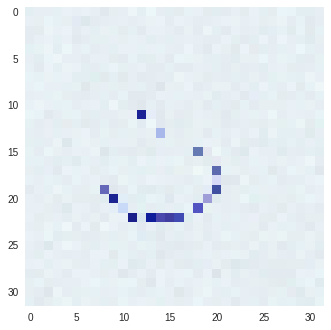

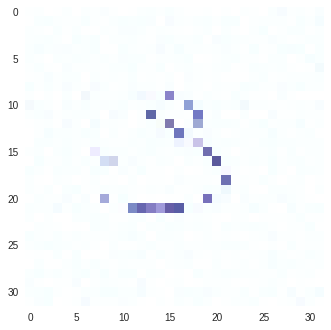

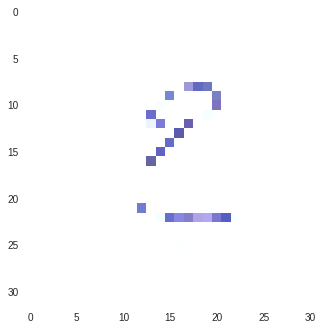

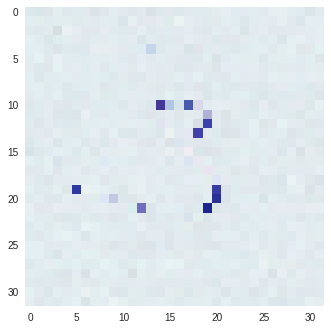

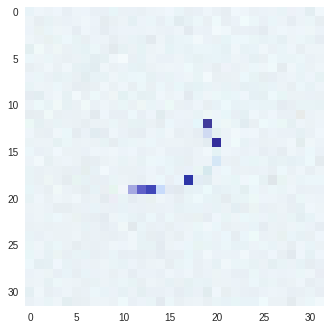

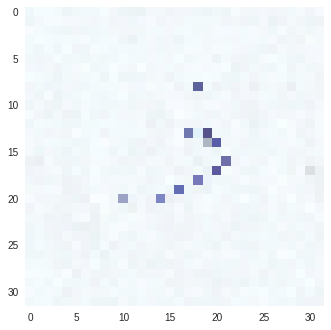

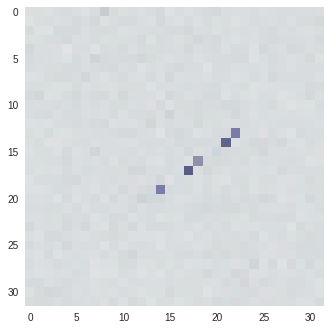

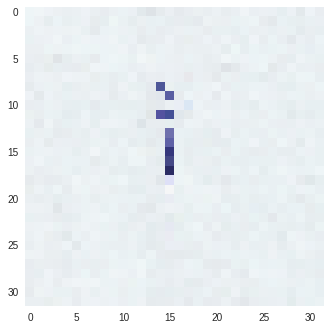

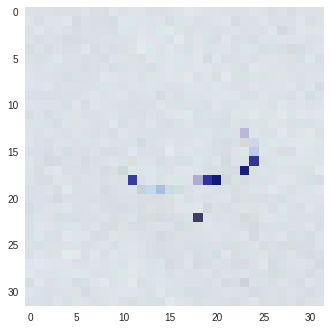

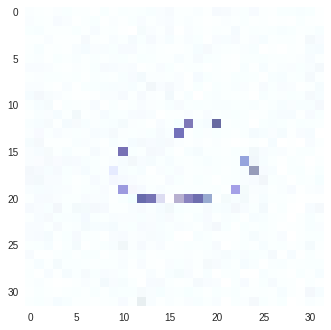

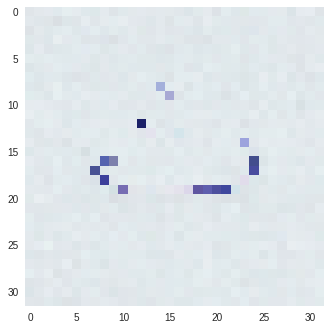

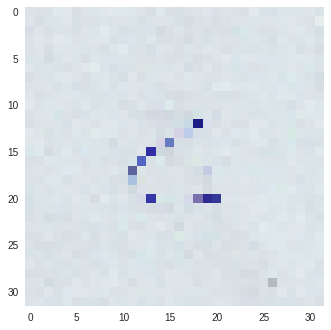

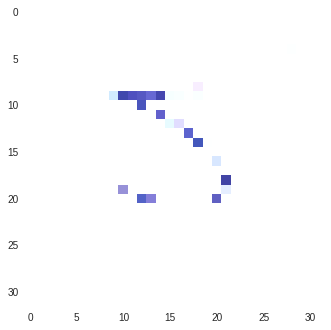

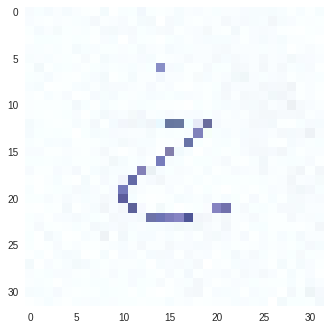

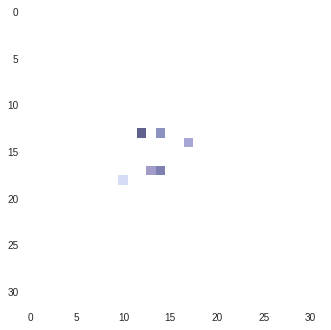

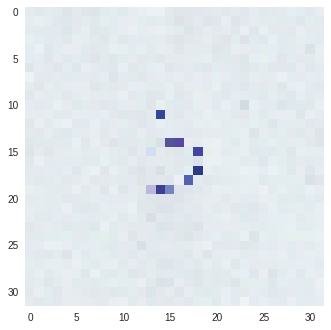

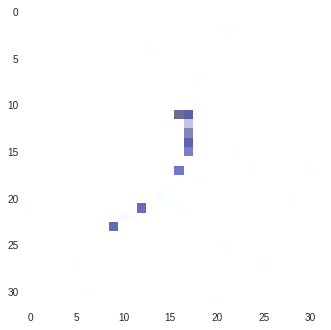

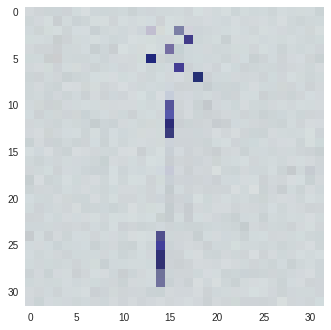

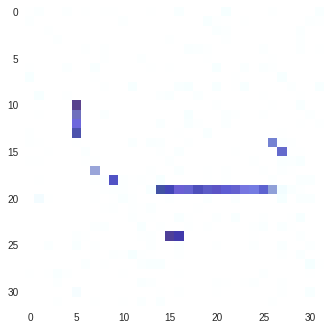

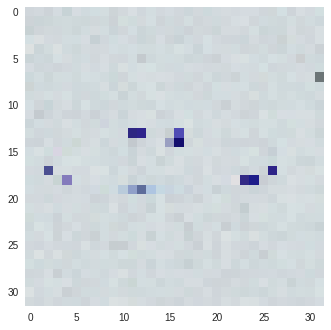

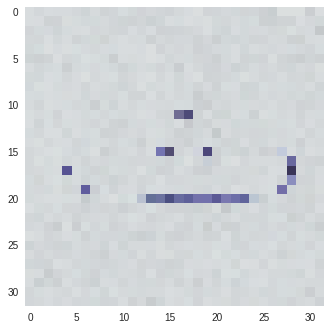

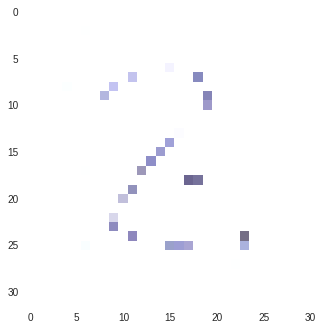

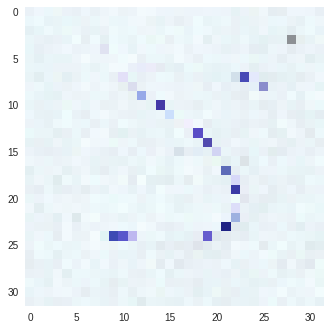

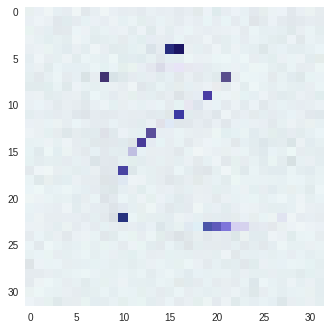

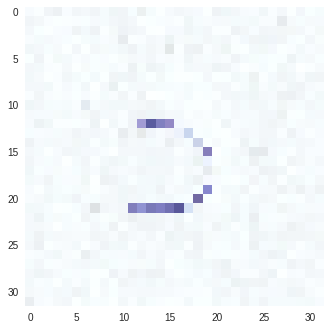

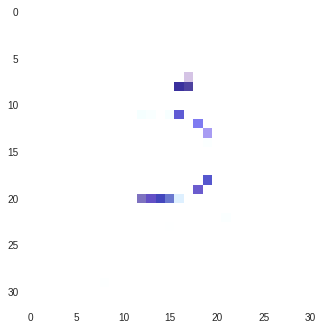

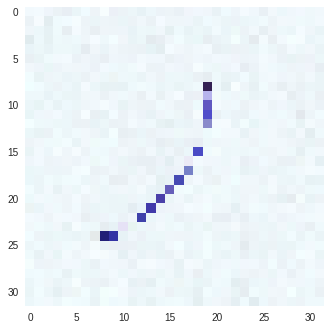

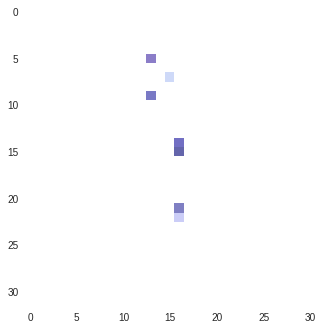

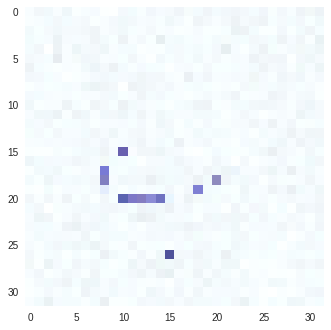

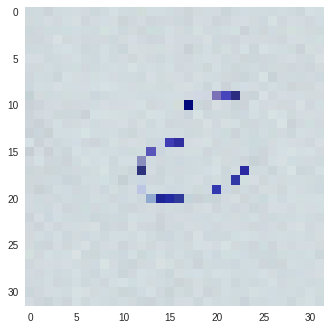

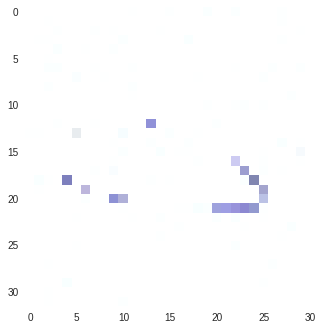

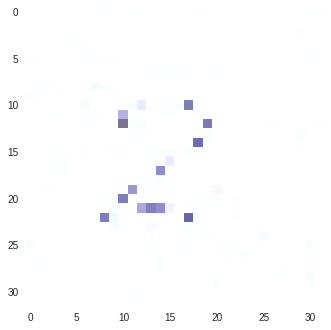

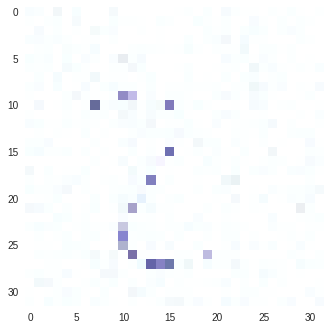

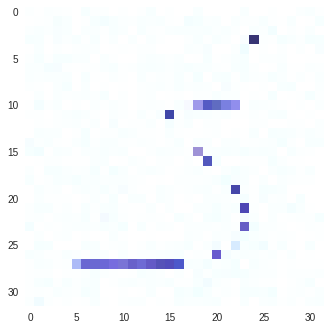

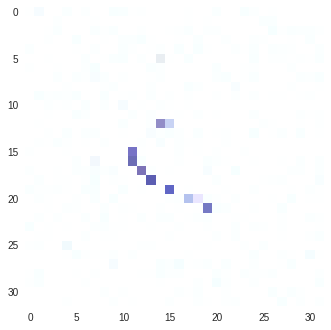

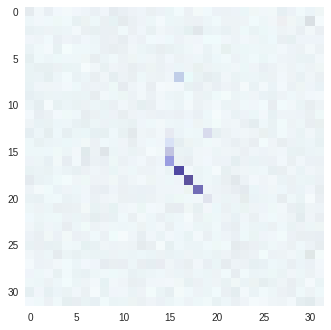

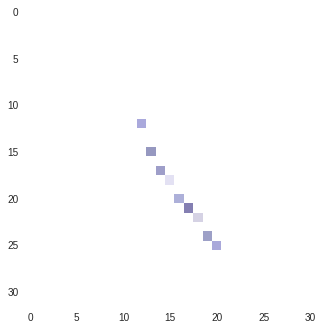

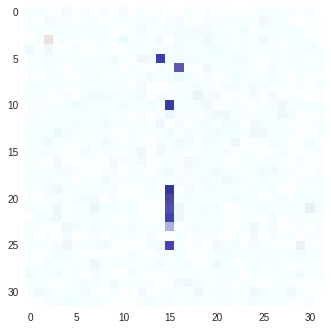

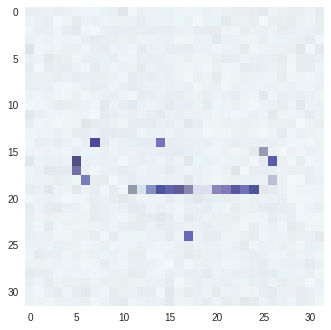

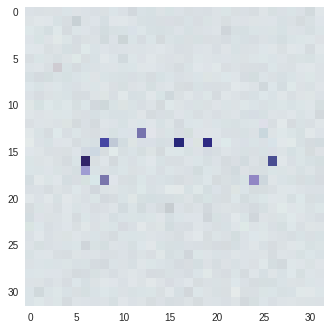

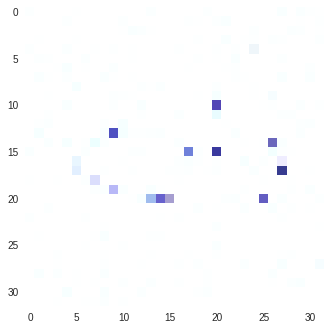

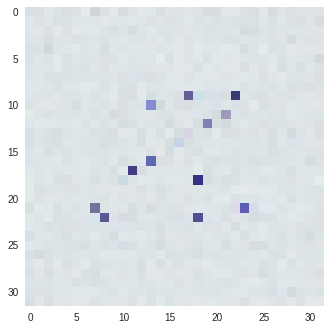

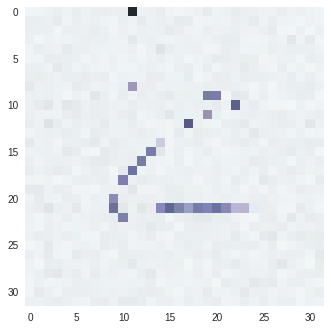

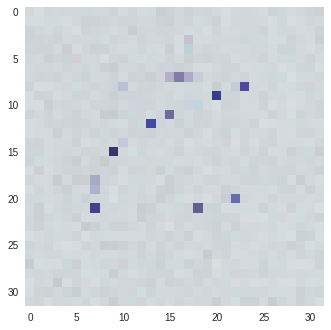

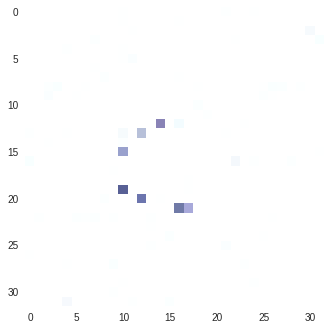

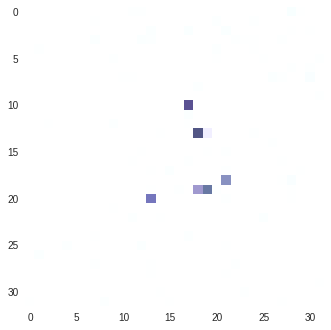

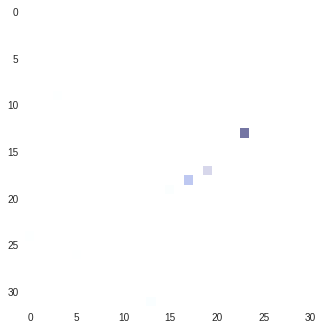

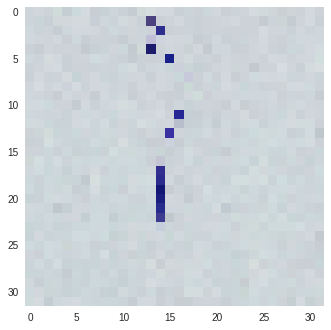

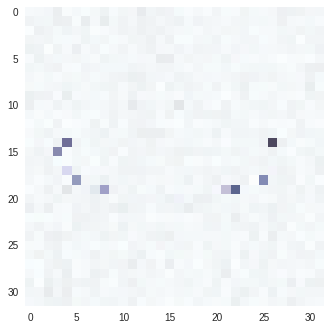

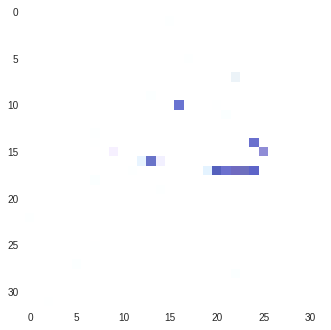

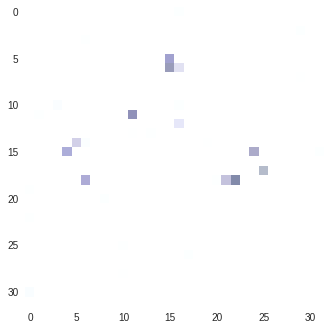

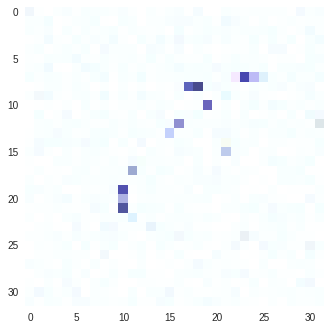

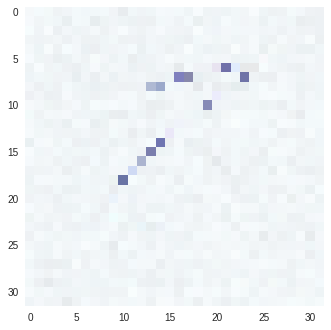

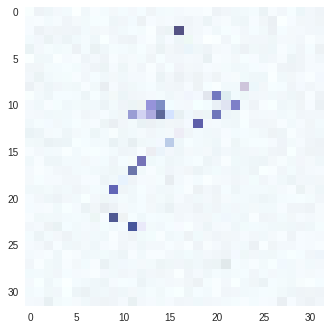

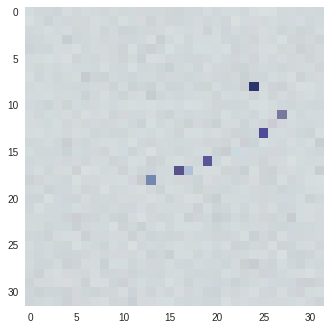

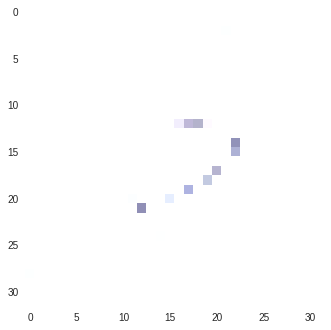

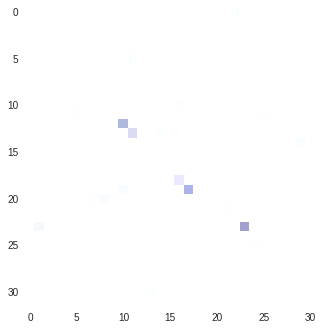

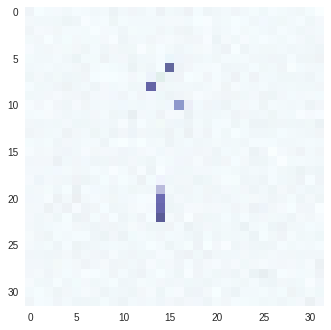

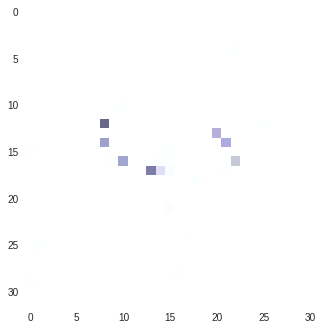

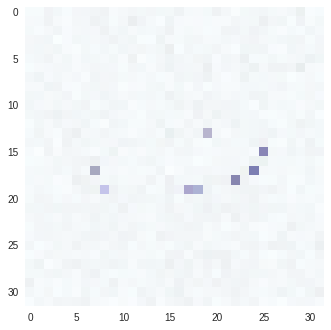

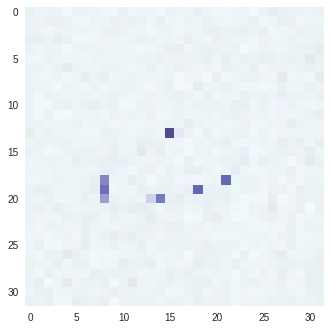

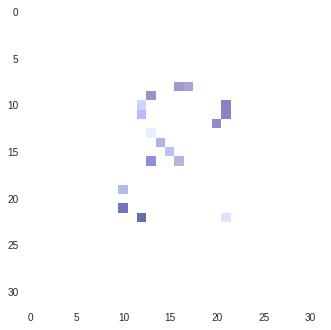

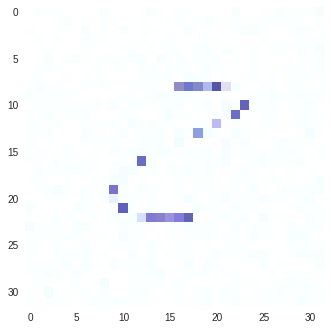

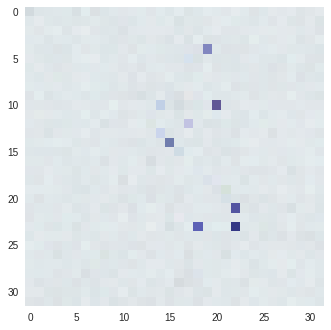

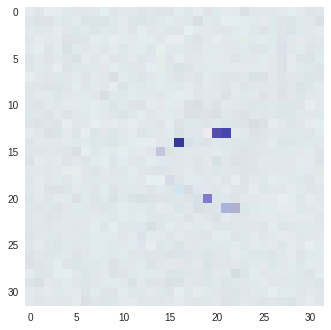

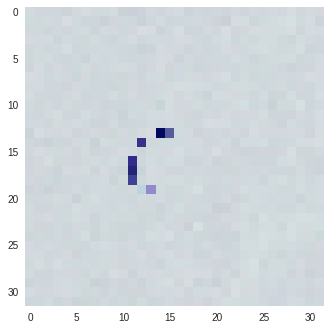

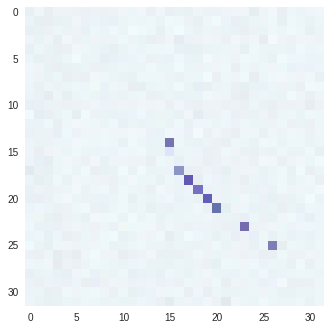

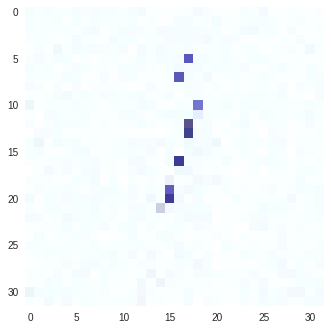

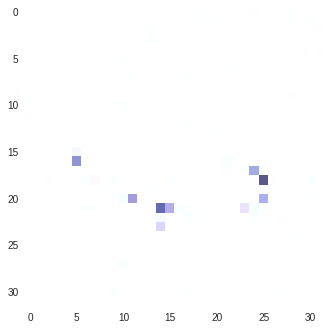

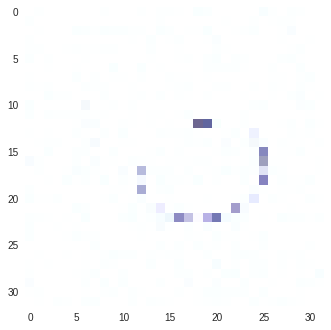

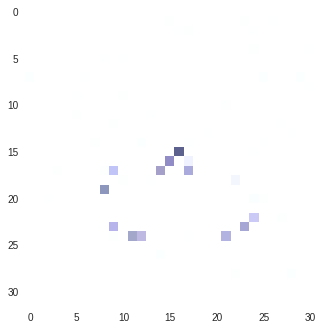

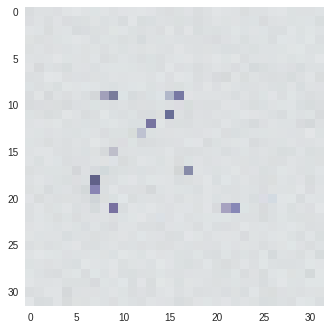

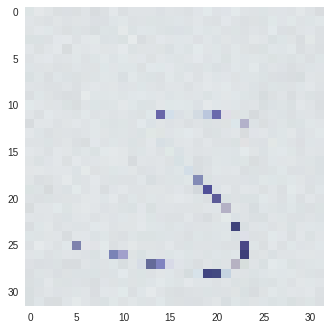

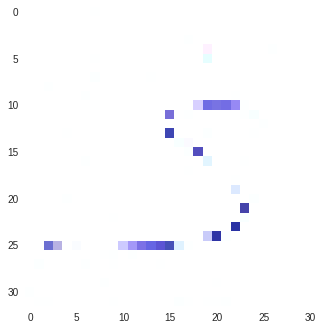

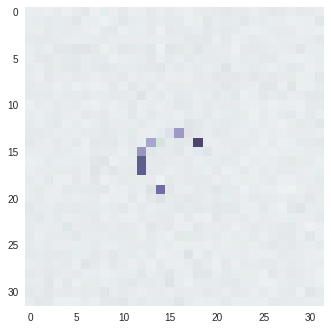

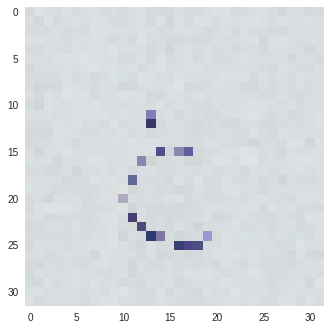

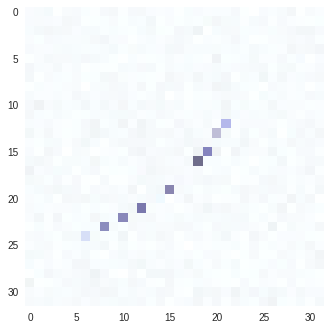

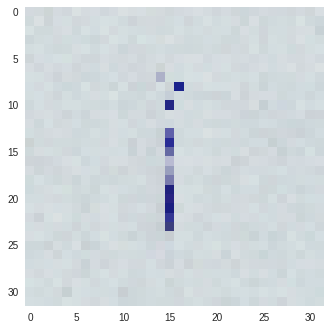

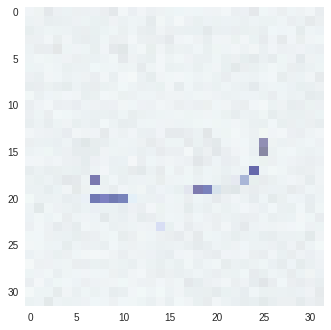

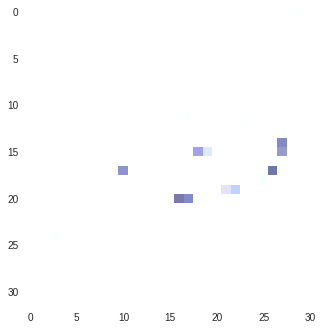

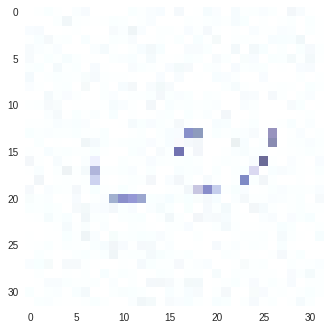

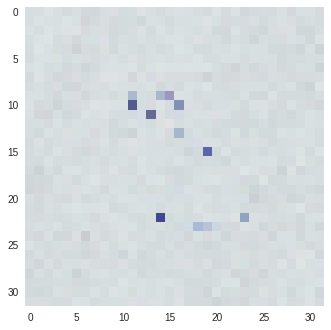

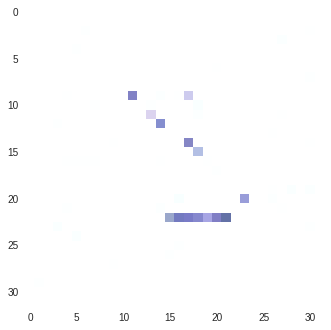

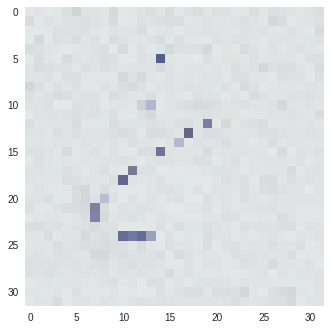

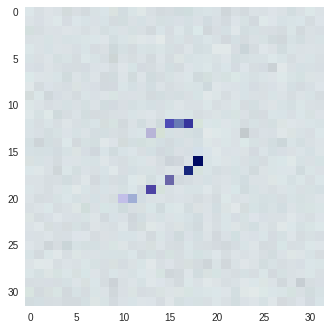

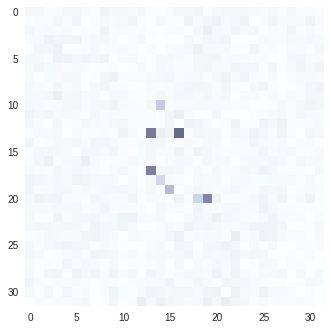

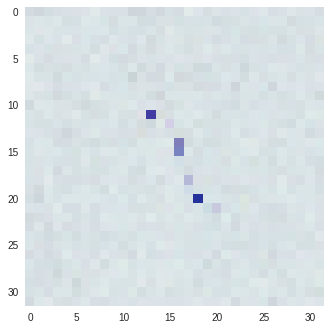

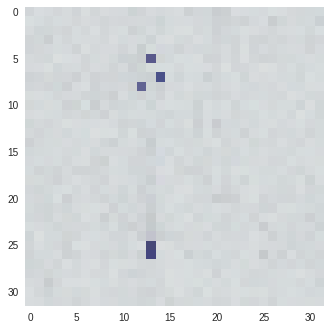

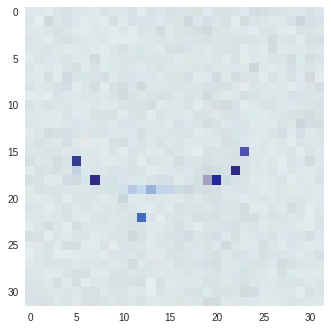

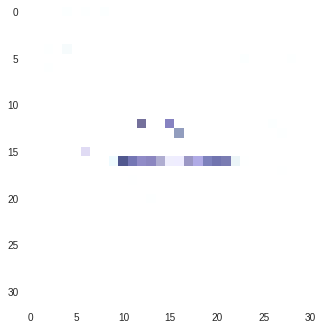

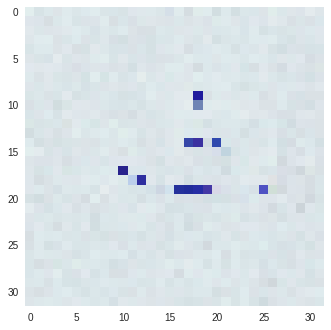

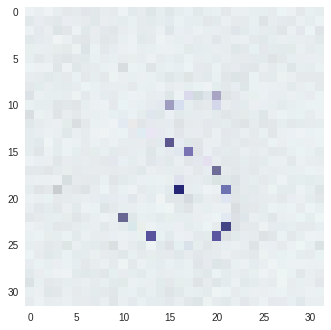

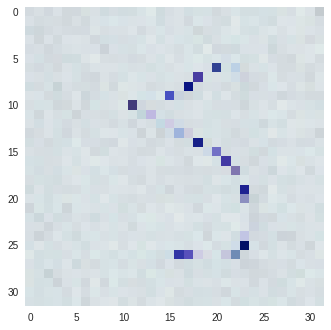

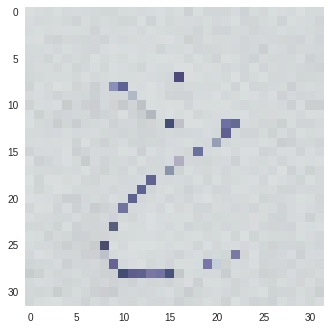

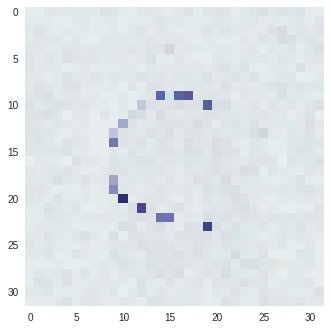

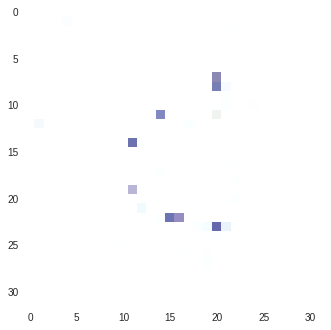

In [34]:
for i in range(99):
  plt.figure()
  plt.imshow(X[i])
  plt.grid(False)